# From-scratch Gradient Descent 

⚠️ `this notebook simulate the optimizers, just for intuition understanding` *not the exact formula implementation* ⚠️

In [23]:
import matplotlib.pyplot as plt
import numpy as np

## 1D

In [24]:
def func(x):
  return x**2

def func_grad(x):
  return 2*x

In [25]:
def gradient_descent(lr, func_grad):
  x = -10
  x_values = [x]
  for i in range(10):
    x -= lr*func_grad(x)
    x_values.append(x)
  print("iteration 10, x: %s"%x)
  return x_values

In [26]:
def search_path(x_vals, func):
  x_line = np.arange(-15, 15, 0.01)
  plt.plot(x_line, [func(x) for x in x_line])
  plt.plot(x_vals, [func(x) for x in x_vals], "ro-")

iteration 10, x: -0.060466176000000066


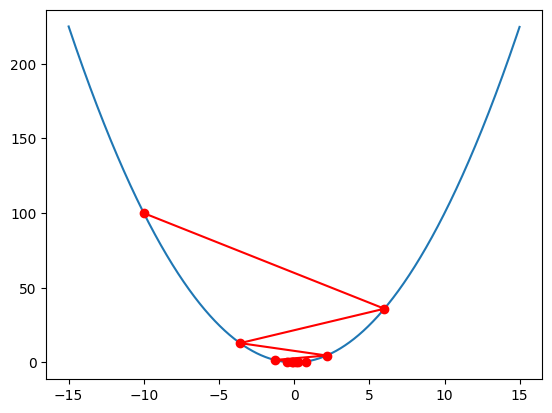

In [27]:
x_values = gradient_descent(0.8, func_grad)
search_path(x_values, func)

## 2D

In [28]:

# 2 * x2**2   => for just having a different parameter 
def func(x1, x2):
  return x1**2 + 2 * x2**2

def func_grad(x1, x2):
  return (2*x1, 4*x2)

In [29]:
class Optimizers:
  def __init__(self, lr_schedule):
    self.lr_schedule = lr_schedule
  
  def lr(self, rate, t):
    if self.lr_schedule == "constant":
      return self.constant_lr(rate)
    elif self.lr_schedule == "power":
      return self.power_lr(rate, t)
  
  def constant_lr(self, rate):
    return rate
  
  def power_lr(self, rate, t):
    c = 1
    s = 10
    print(rate/(1 + t/s)**c)
    return rate/(1 + t/s)**c

  def gradient_descent(self, x1, x2, t1, t2, func_grad, rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0
  



  def stochastic_gradient_descent(self, x1, x2, t1, t2, func_grad,rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    gr_x1 += np.random.normal(0, 1)
    gr_x2 += np.random.normal(0, 1)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0
  


  def gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad,rate, t):
   # first `x` gradient will be calculated => then update `v`  by the gradient of `x` => then new x is = `x`+ `v`
    alpha = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr(rate, t)*gr_x1
    v2 = alpha*v2 - self.lr(rate, t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2
 



  def nesterov_gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad,rate, t):
   # first add `alpha * v` to `x` => then update `v` by the gradient of `x` => then new x is = `x`+ `v`
    alpha = 0.9
    x1 += alpha*v1 
    x2 += alpha*v2 
    gr_x1, gr_x2 = func_grad(x1, x2)

    v1 =alpha*v1 - self.lr(rate, t)*gr_x1
    v2 =alpha*v2 - self.lr(rate, t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2
  



  def ada_grad(self, x1, x2, r1, r2, func_grad,rate, t):
    delta = 1e-7

    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 += gr_x1**2 
    r2 += gr_x2**2 
    x1 -= (self.lr(rate,t) / (delta+np.sqrt(r1)) *gr_x1)
    x2 -= (self.lr(rate,t) / (delta+np.sqrt(r2)) *gr_x2)
    return x1, x2, r1, r2


  def rmsprop(self, x1, x2, r1, r2, func_grad,rate, t):
    delta = 1e-7
    rho = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 = r1*rho + (1-rho)*gr_x1**2
    r2 = r2*rho + (1-rho)*gr_x2**2
    x1 -= self.lr(rate,t)/np.sqrt(delta+r1)*gr_x1
    x2 -= self.lr(rate,t)/np.sqrt(delta+r2)*gr_x2
    return x1, x2, r1, r2



  def adam(self, x1, x2, s1, s2, r1, r2,rate, t, func_grad):
    delta, rho1, rho2 = 1e-8, 0.9, 0.999
    gr_x1, gr_x2 = func_grad(x1, x2)

    s1 = rho1*s1 + (1-rho1)*gr_x1
    s2 = rho1*s2 + (1-rho1)*gr_x2

    r1 = rho2*r1 + (1-rho2)*gr_x1**2
    r2 = rho2*r2 + (1-rho2)*gr_x2**2

    s_hat1 = s1/(1-rho1**(t+1))
    s_hat2 = s2/(1-rho1**(t+1))

    r_hat1 = r1/(1-rho2**(t+1))
    r_hat2 = r2/(1-rho2**(t+1))

    x1 -= self.lr(rate,t)*s_hat1/(np.sqrt(r_hat1)+delta)
    x2 -= self.lr(rate,t)*s_hat2/(np.sqrt(r_hat2)+delta)

    return x1, x2, s1, s2, r1, r2


In [30]:
def search(optimizer, func_grad, rate, iteration=20):
  x1, x2, t1, t2 = -5, -4, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad, rate, i+1)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations

In [31]:
def search_path(func, x_iterations):

  # print(*x_iterations)
  # print("_"*50)
  # print(*zip(*x_iterations))
  # print("_"*50)

  plt.plot(*zip(*x_iterations), "-o", color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

epoch 20, x1:-0.057646075230342354, x2:-0.0001462463376025189


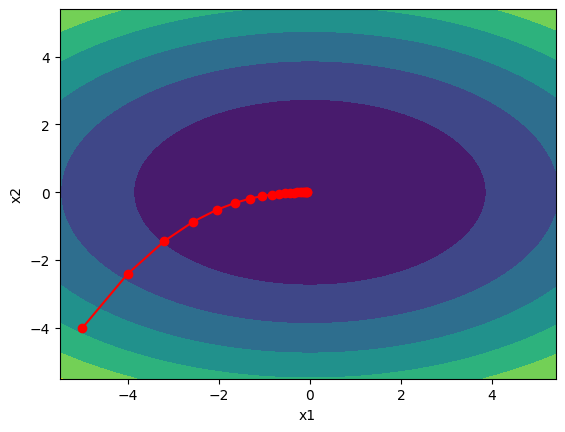

In [32]:
opt = Optimizers("constant")
# search finding optimums => returns x_iterations array 
# search_path plots the X's 
search_path(func, search(opt.gradient_descent, func_grad, 0.1))

In [33]:
print(*search(opt.gradient_descent, func_grad, 0.1))

epoch 20, x1:-0.057646075230342354, x2:-0.0001462463376025189
(-5, -4) (-4.0, -2.4) (-3.2, -1.44) (-2.56, -0.864) (-2.048, -0.5184) (-1.6384, -0.31104) (-1.31072, -0.18662399999999998) (-1.0485760000000002, -0.11197439999999999) (-0.8388608000000002, -0.06718463999999999) (-0.6710886400000001, -0.04031078399999999) (-0.5368709120000001, -0.024186470399999993) (-0.4294967296000001, -0.014511882239999996) (-0.3435973836800001, -0.008707129343999996) (-0.27487790694400005, -0.005224277606399997) (-0.21990232555520003, -0.0031345665638399982) (-0.17592186044416003, -0.001880739938303999) (-0.140737488355328, -0.0011284439629823994) (-0.11258999068426241, -0.0006770663777894395) (-0.09007199254740993, -0.0004062398266736637) (-0.07205759403792794, -0.0002437438960041982) (-0.057646075230342354, -0.0001462463376025189)


epoch 20, x1:0.2532660946525762, x2:0.12473768838142854


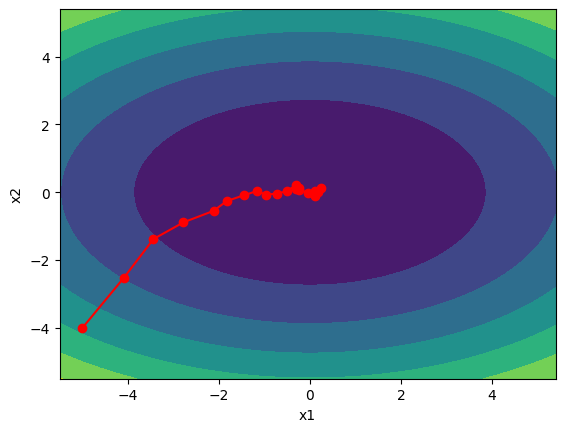

In [34]:
opt = Optimizers("constant")

search_path(func, search(opt.stochastic_gradient_descent, func_grad,0.1))

## Momentum

epoch 20, x1:1.353356690803952, x2:1.1023413364488264


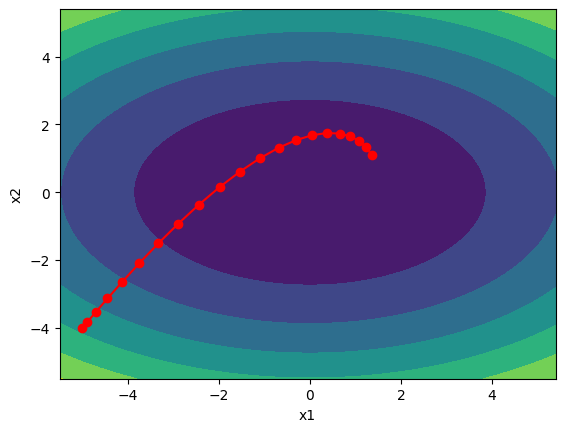

In [35]:
opt = Optimizers("constant")

search_path(func, search(opt.gradient_descent_with_momentum, func_grad,0.01))

## nesterov_gradient_descent_with_momentum

epoch 20, x1:1.6148263020774718, x2:-0.8980800336432664


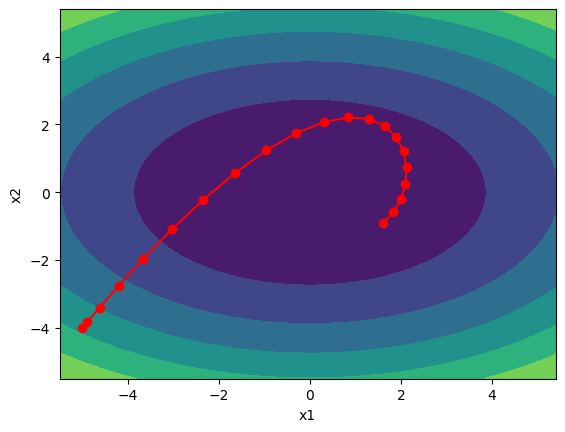

In [36]:
opt = Optimizers("constant")

search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad,0.01))

## ada_grad

epoch 20, x1:-5.495313643954111e-07, x2:-2.077054479005077e-11


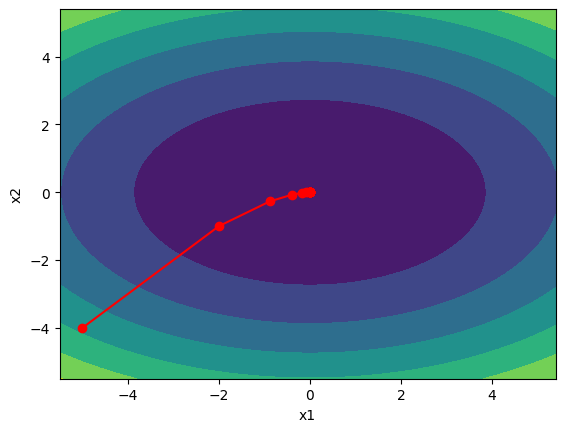

In [37]:
opt = Optimizers("constant")

search_path(func, search(opt.ada_grad, func_grad,3))

## RMSPROP (Root Mean Square Propagation)

epoch 20, x1:-0.000343174646715899, x2:-4.666358970448923e-07


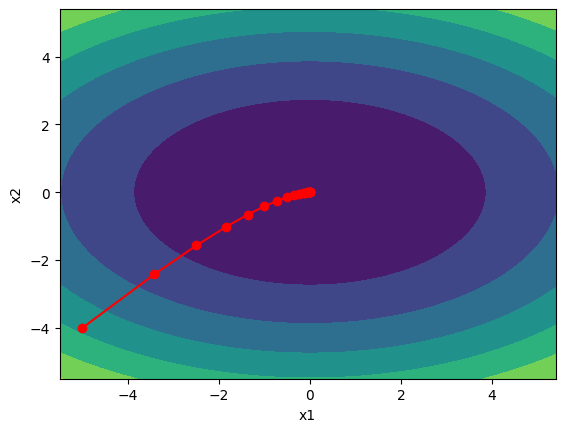

In [38]:
opt = Optimizers("constant")

search_path(func, search(opt.rmsprop, func_grad,0.5))

## Adam

In [39]:
def search_adam(optimizer_adam, func_grad,rate, iterations=20):
  x1, x2, s1, s2, r1, r2 = -5, -2, 0, 0, 0, 0
  x_iterations = [(x1, x2)]
  for t in range(iterations):
    x1, x2, s1, s2, r1, r2 = optimizer_adam(x1, x2, s1, s2, r1, r2,rate, t, func_grad)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(t+1, x1, x2))
  return x_iterations

epoch 20, x1:0.9960325823147768, x2:-0.21275065226977835


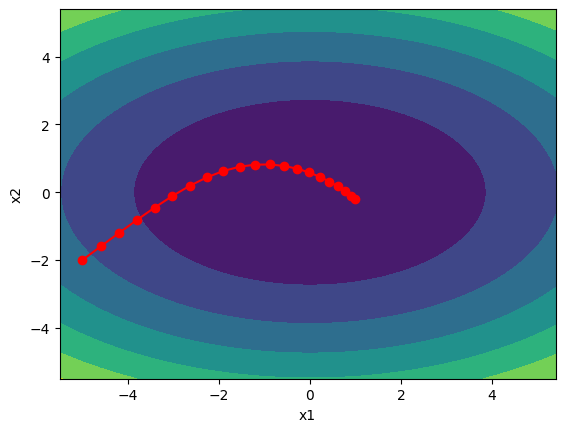

In [40]:
opt = Optimizers("constant")
search_path(func, search_adam(opt.adam, func_grad,0.4))

## power-scheduling

epoch 20, x1:-0.057646075230342354, x2:-0.0001462463376025189


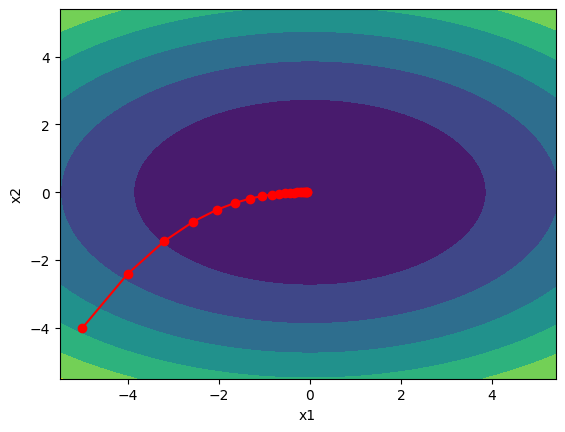

In [41]:
opt = Optimizers("constant")
search_path(func, search(opt.gradient_descent, func_grad, 0.1))

0.09090909090909091
0.09090909090909091
0.08333333333333334
0.08333333333333334
0.07692307692307693
0.07692307692307693
0.07142857142857144
0.07142857142857144
0.06666666666666667
0.06666666666666667
0.0625
0.0625
0.05882352941176471
0.05882352941176471
0.05555555555555556
0.05555555555555556
0.052631578947368425
0.052631578947368425
0.05
0.05
0.047619047619047616
0.047619047619047616
0.045454545454545456
0.045454545454545456
0.04347826086956522
0.04347826086956522
0.04166666666666667
0.04166666666666667
0.04
0.04
0.038461538461538464
0.038461538461538464
0.037037037037037035
0.037037037037037035
0.03571428571428572
0.03571428571428572
0.034482758620689655
0.034482758620689655
0.03333333333333333
0.03333333333333333
epoch 20, x1:-0.5172413793103448, x2:-0.030651340996168577


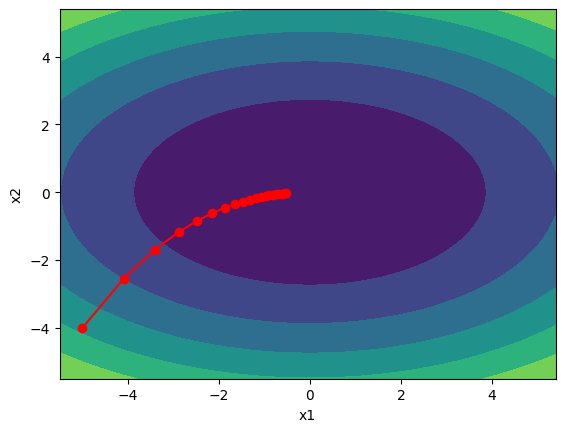

In [42]:
opt = Optimizers("power")
search_path(func, search(opt.gradient_descent, func_grad, 0.1))